In [17]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
# Replace 'folder_path' with the actual path to your folder
folder_path = 'D:\motion_blur_dataset\scans'

# Get a list of all subfolder names in the folder
subfolder_names = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
for index,name in enumerate(subfolder_names):
    subfolder_names[index] = name[4:]

FileNotFoundError: No such file or no access: 'D:\motion_blur_dataset\scans\sub-105822\anat\sub-105822_acq-headmotion1_T1w.nii.gz'

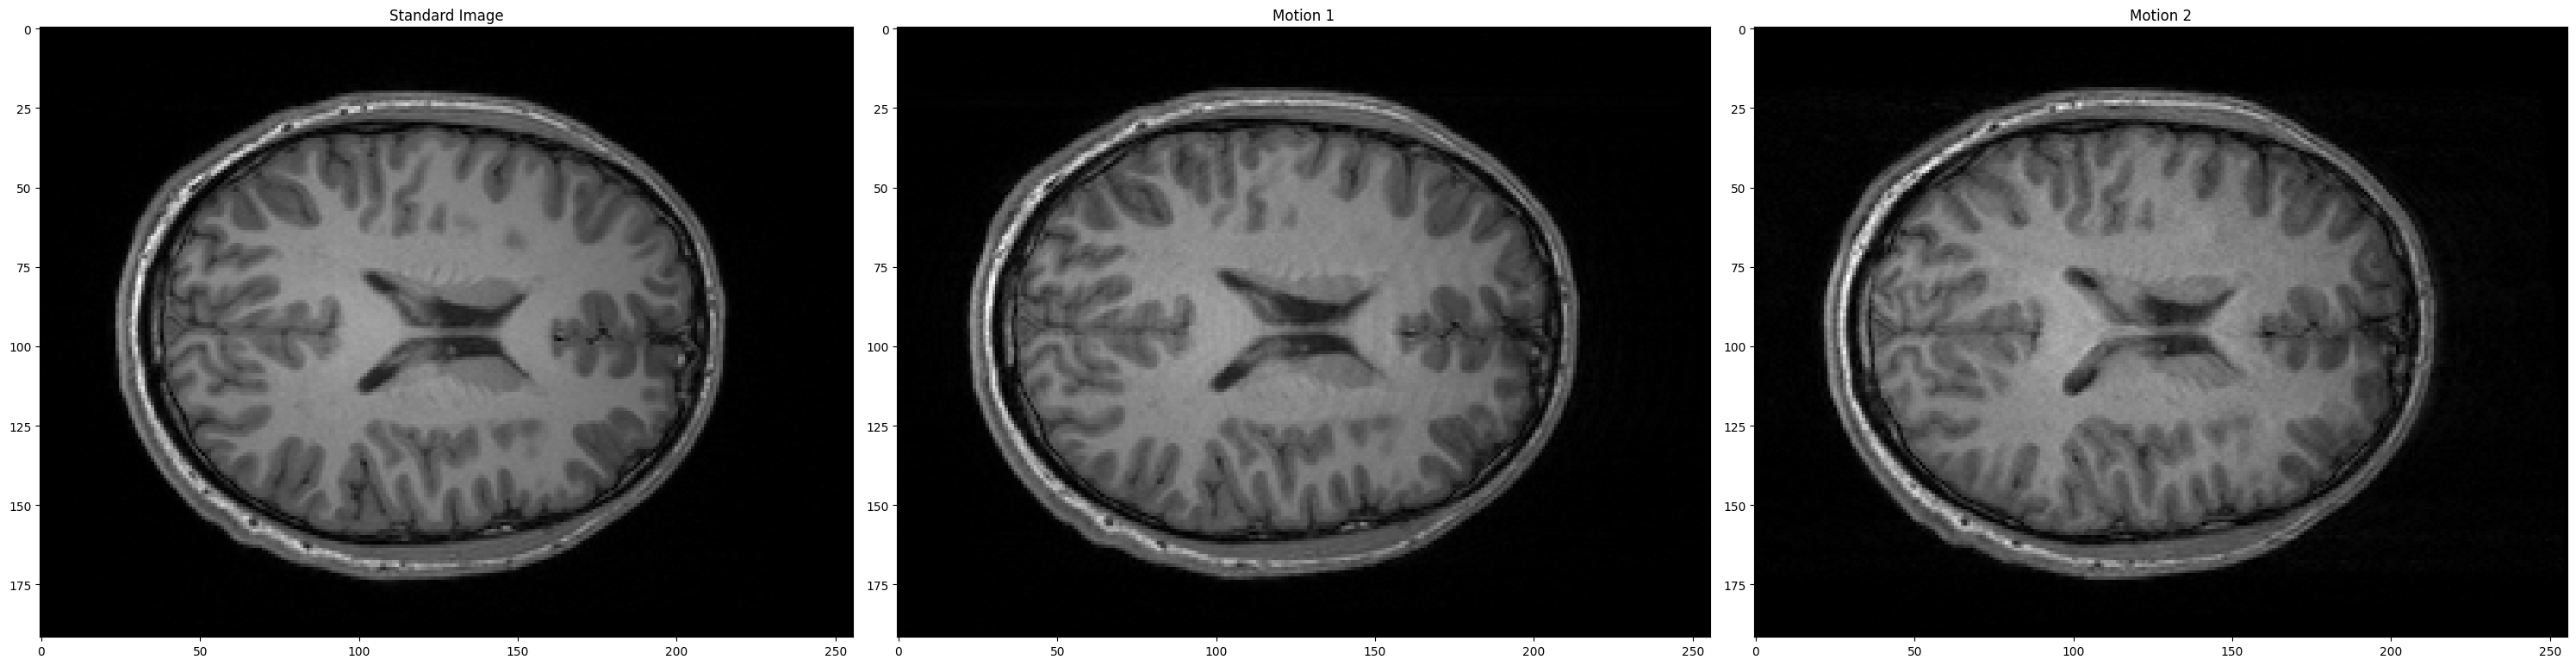

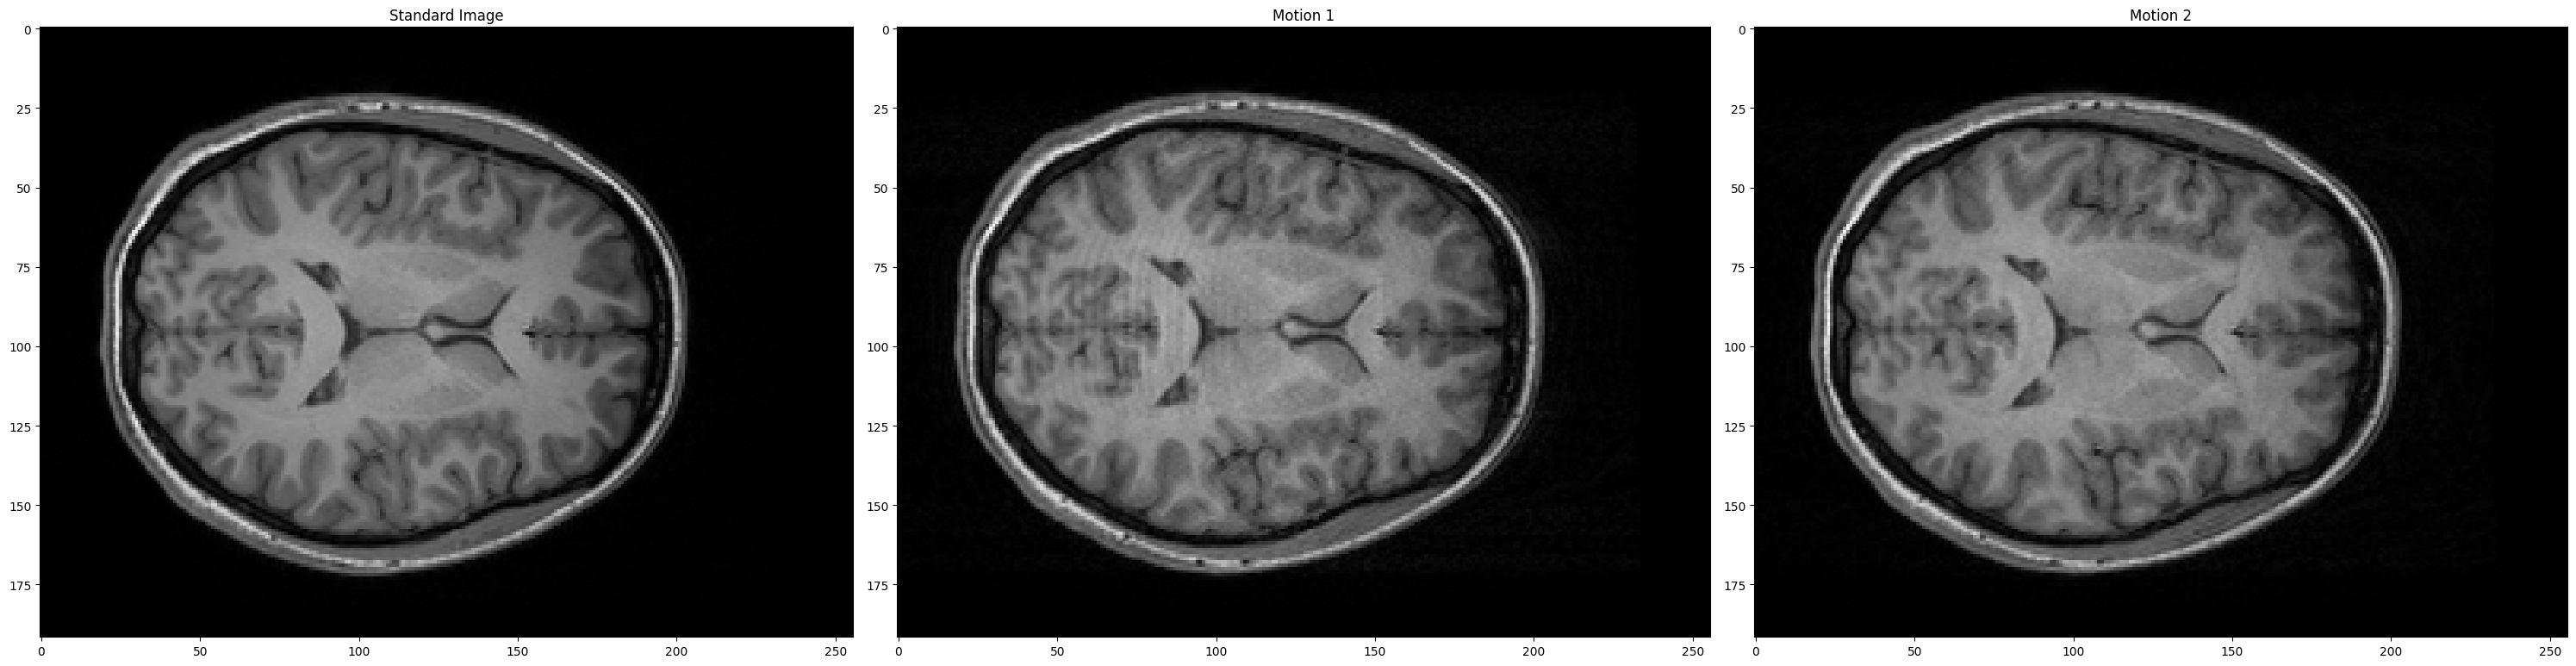

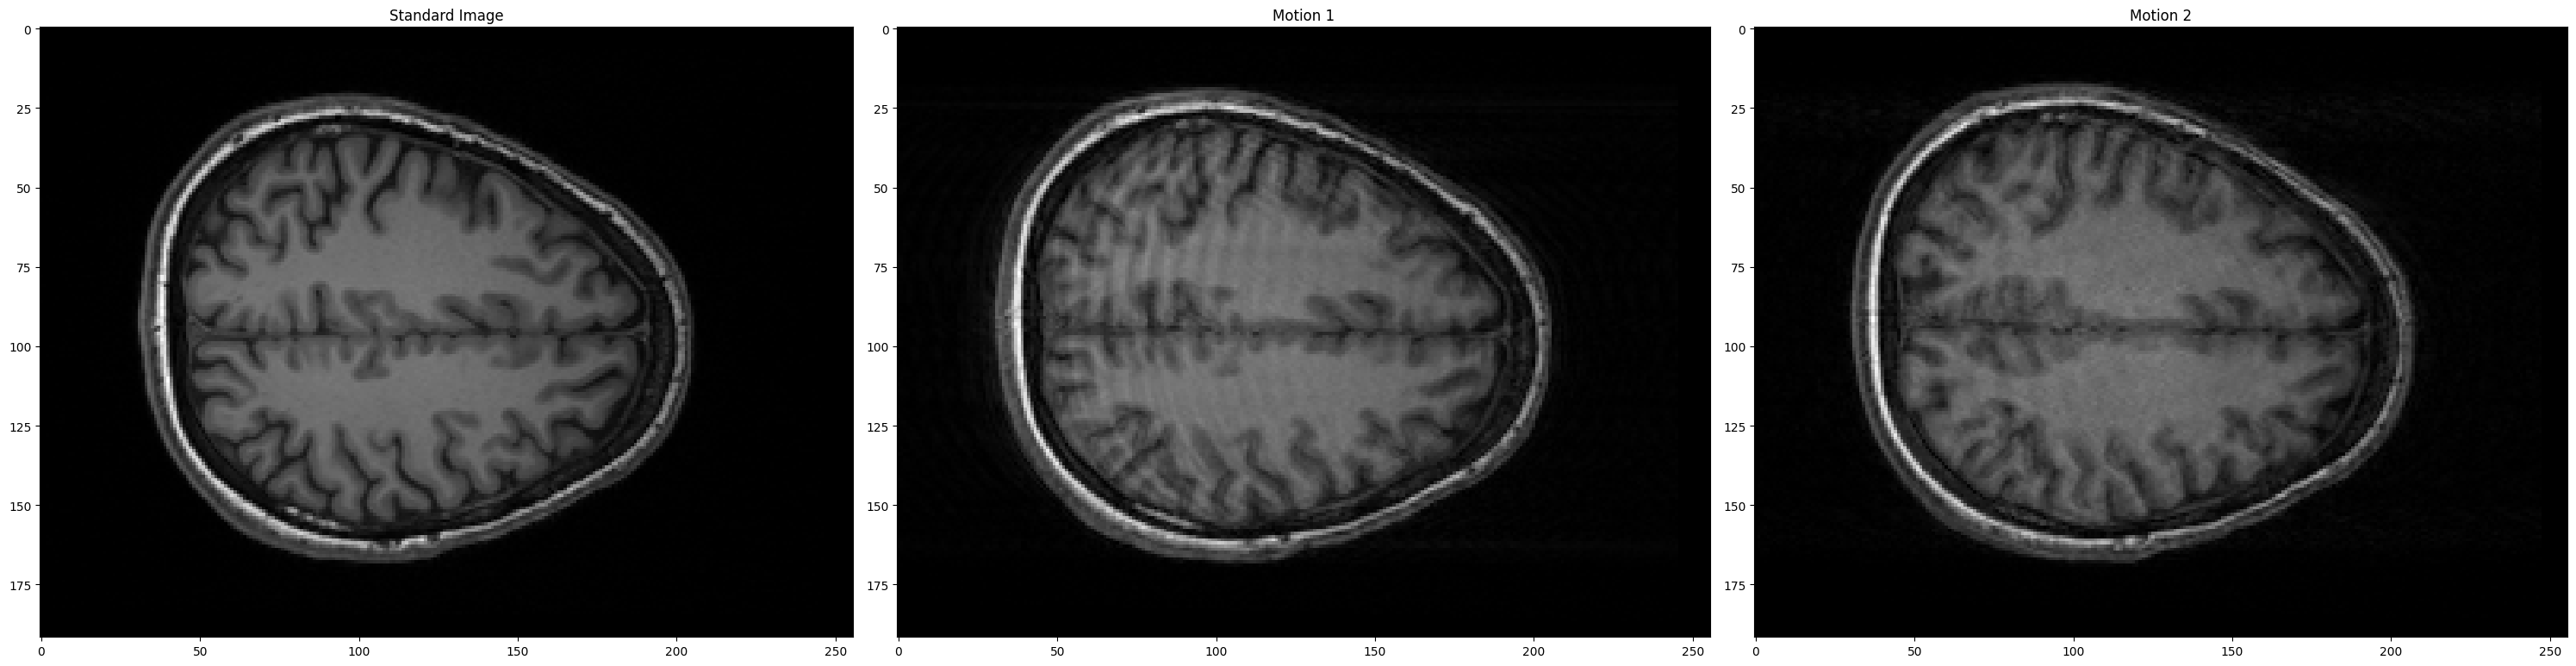

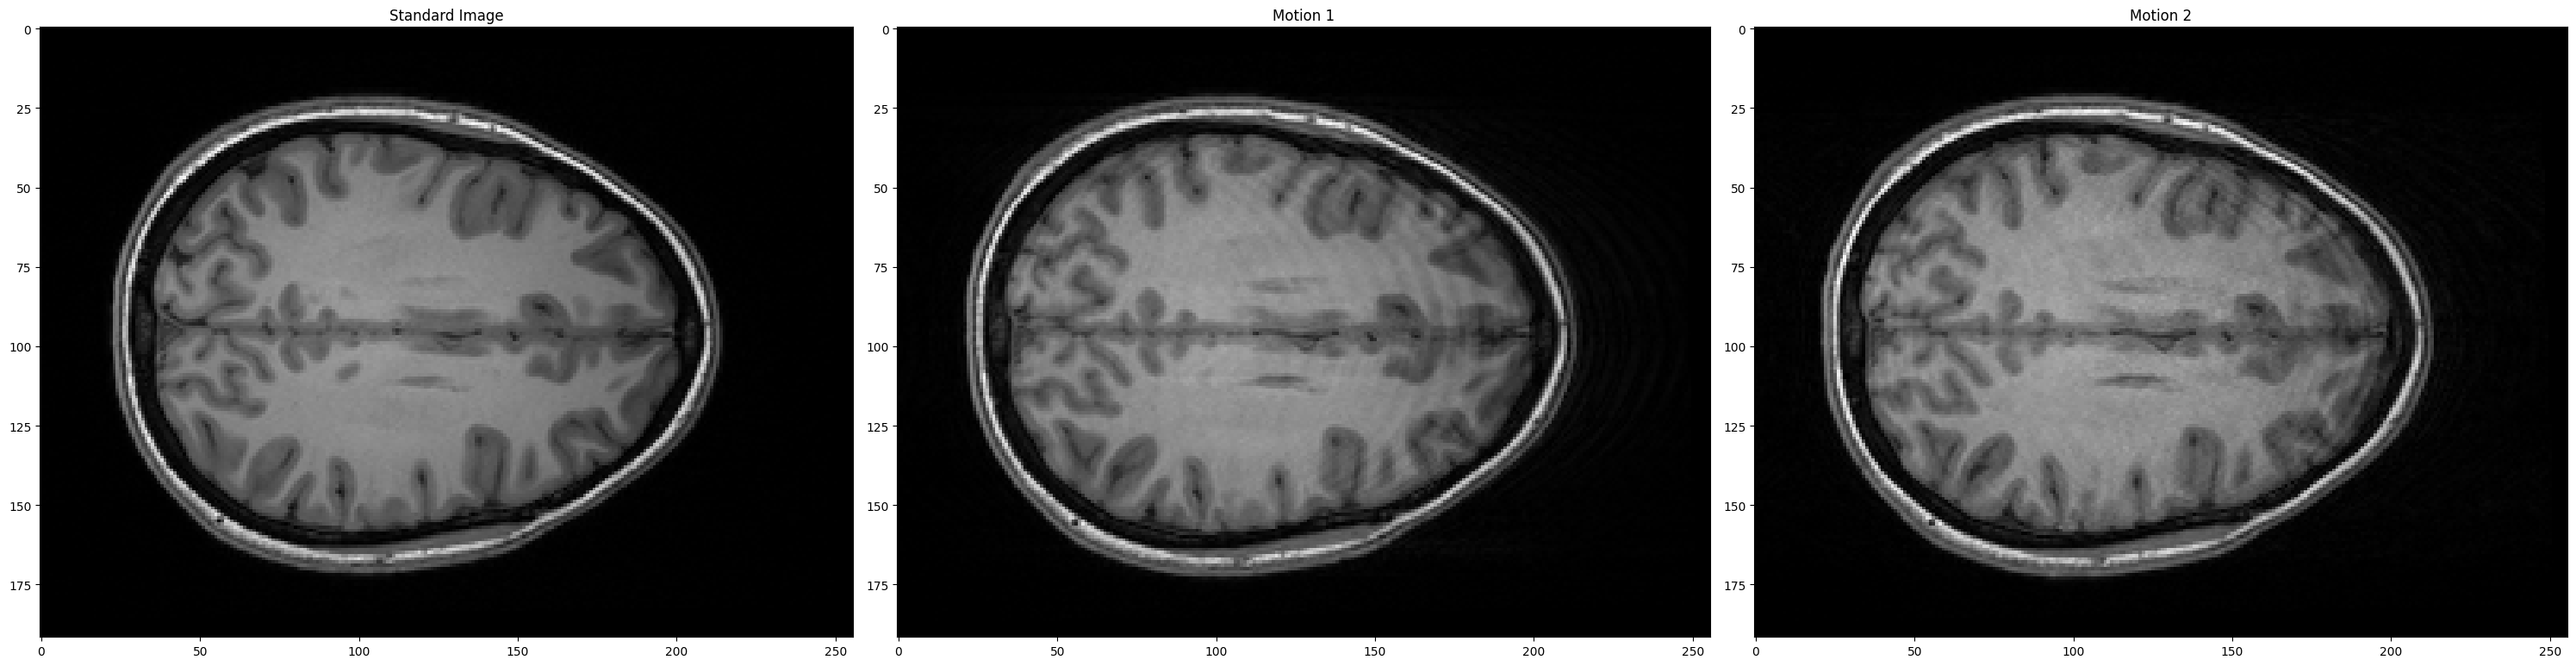

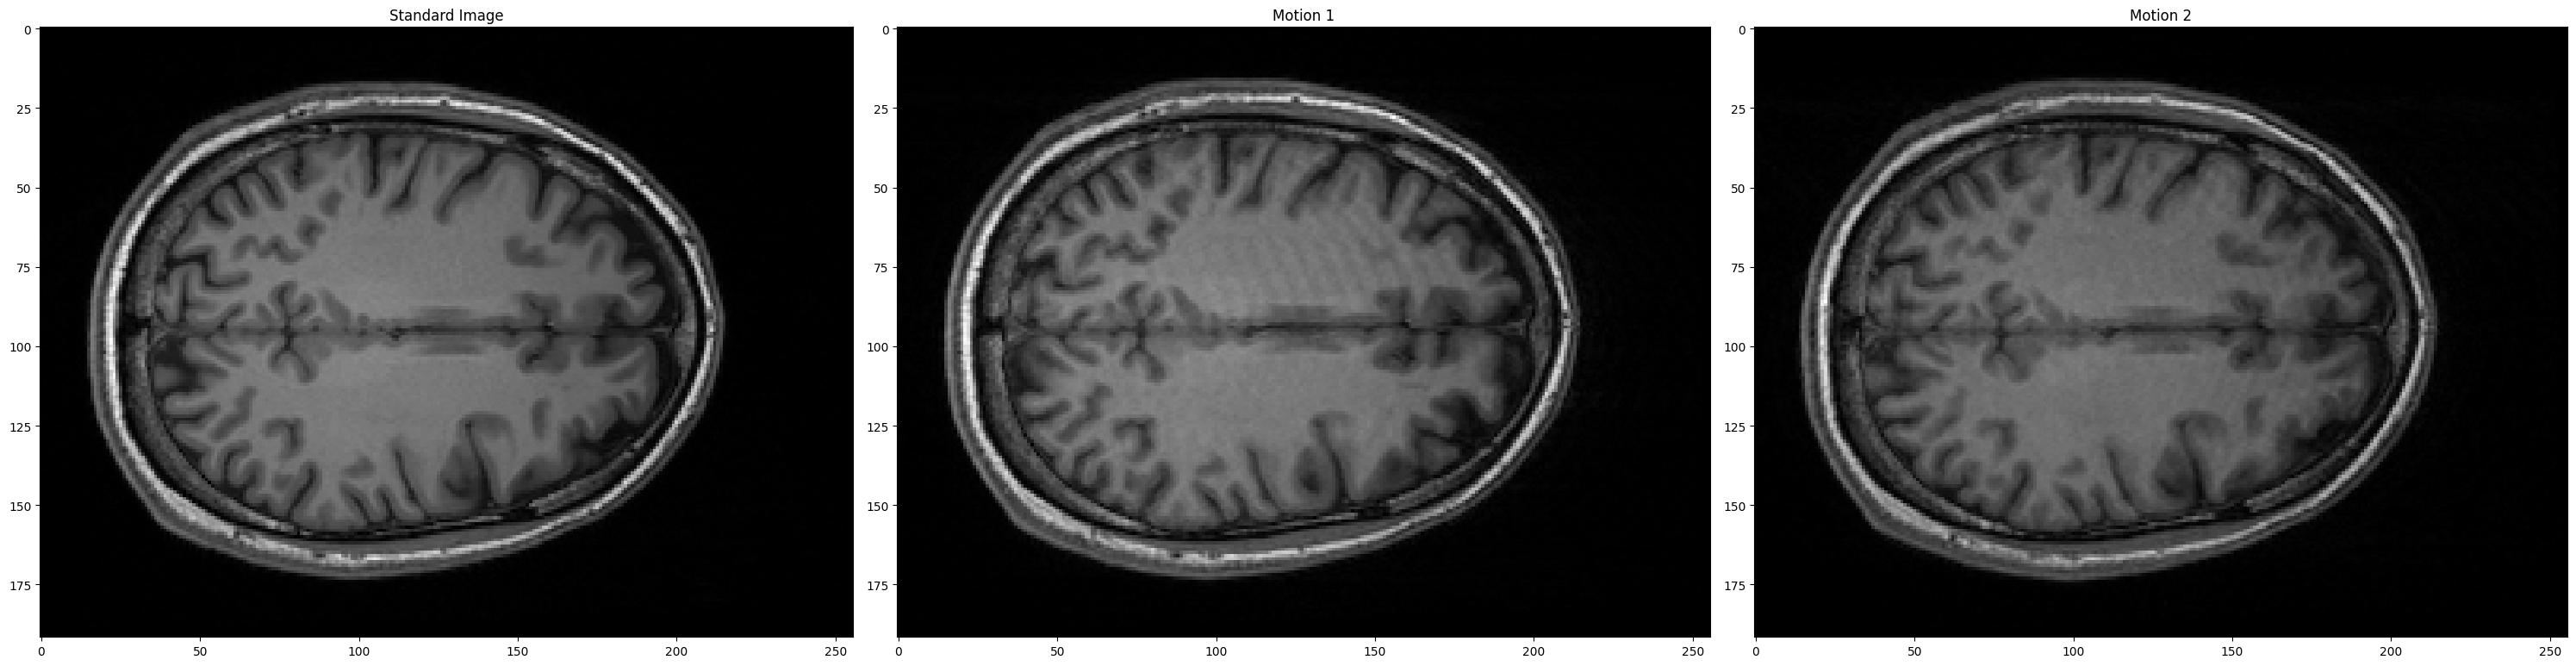

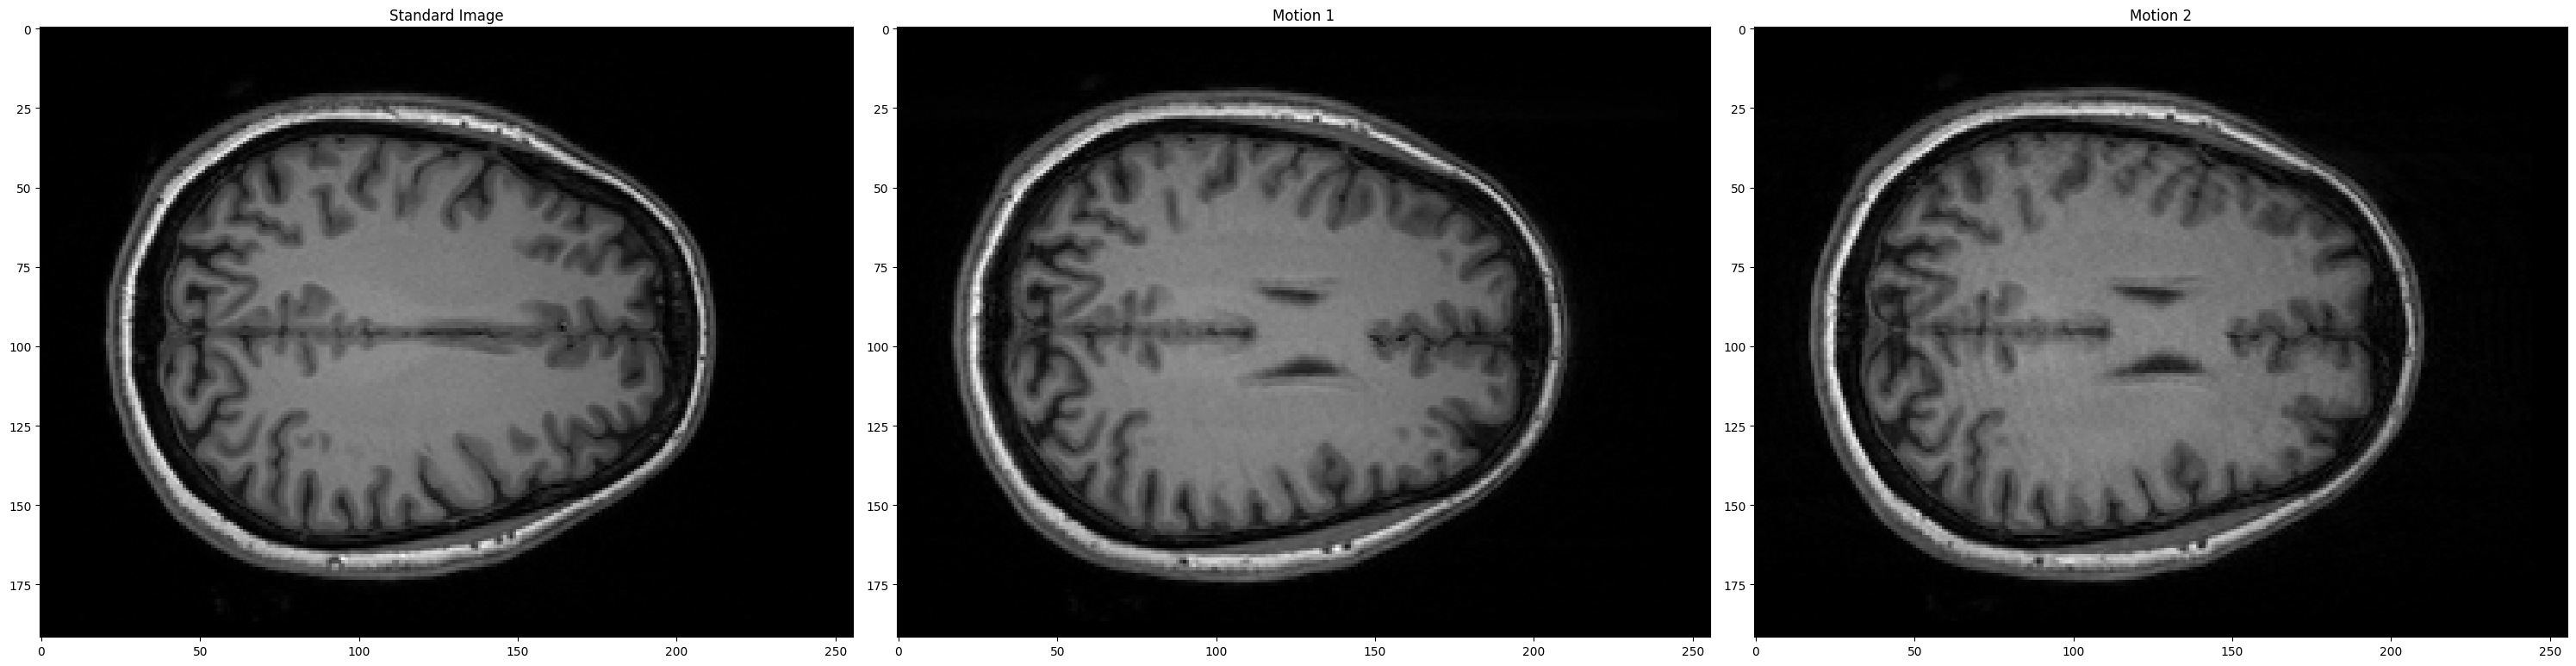

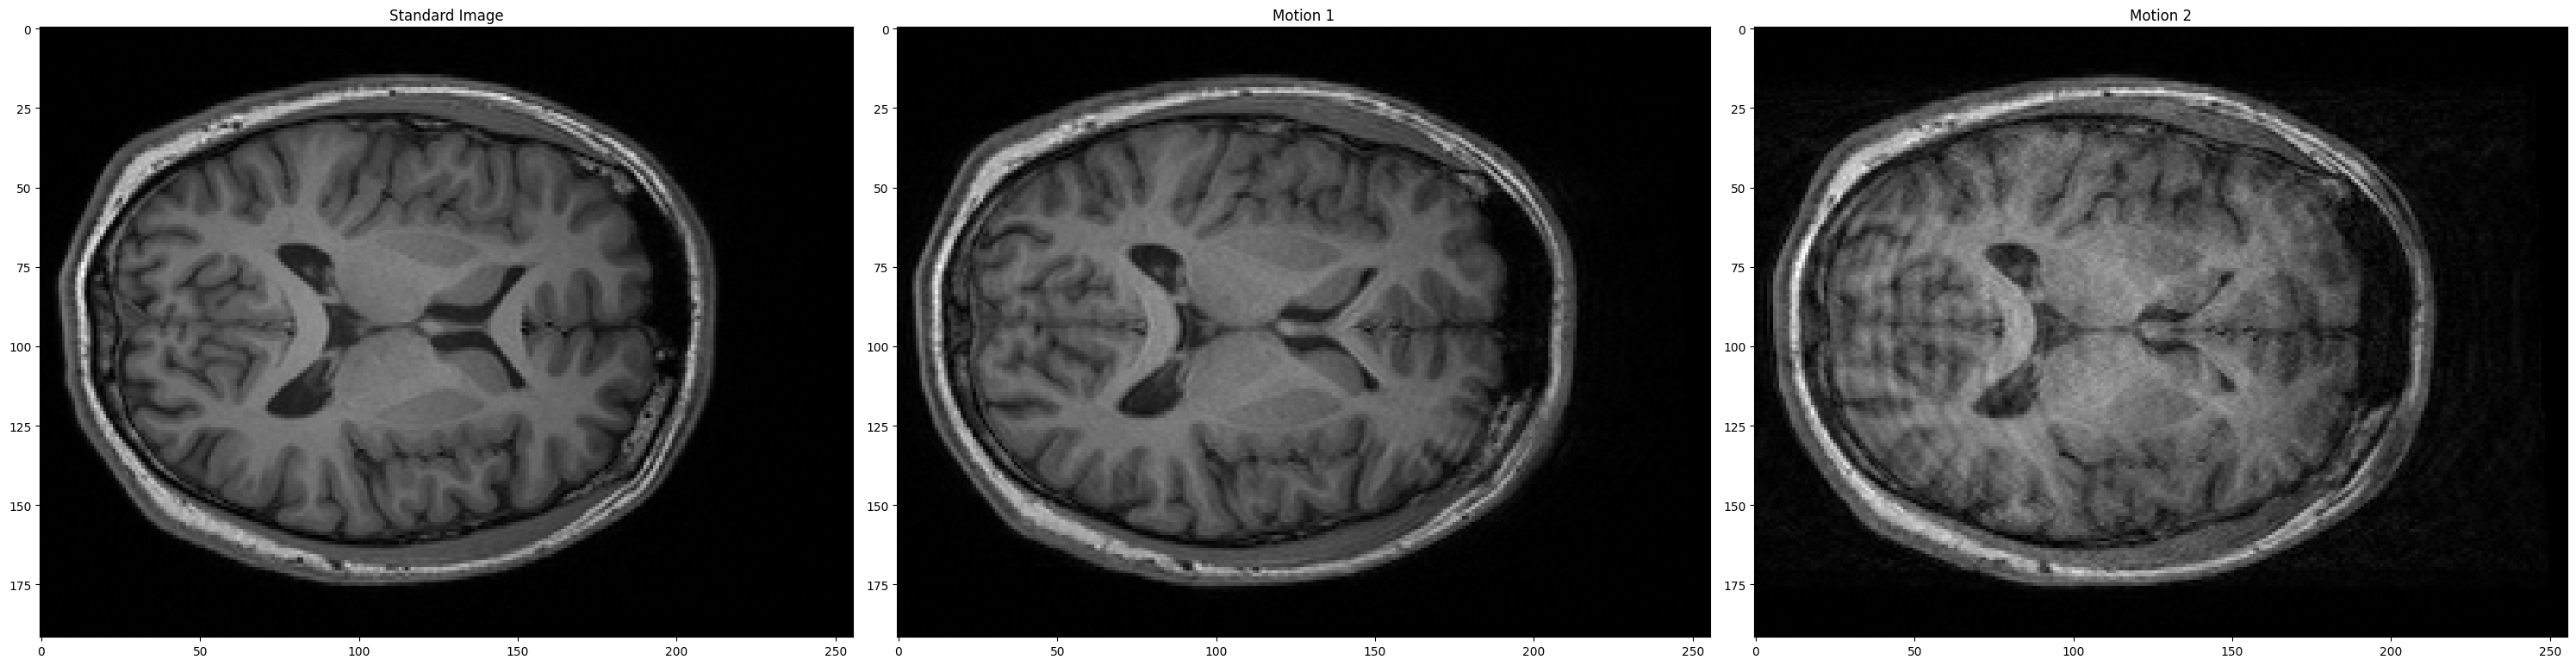

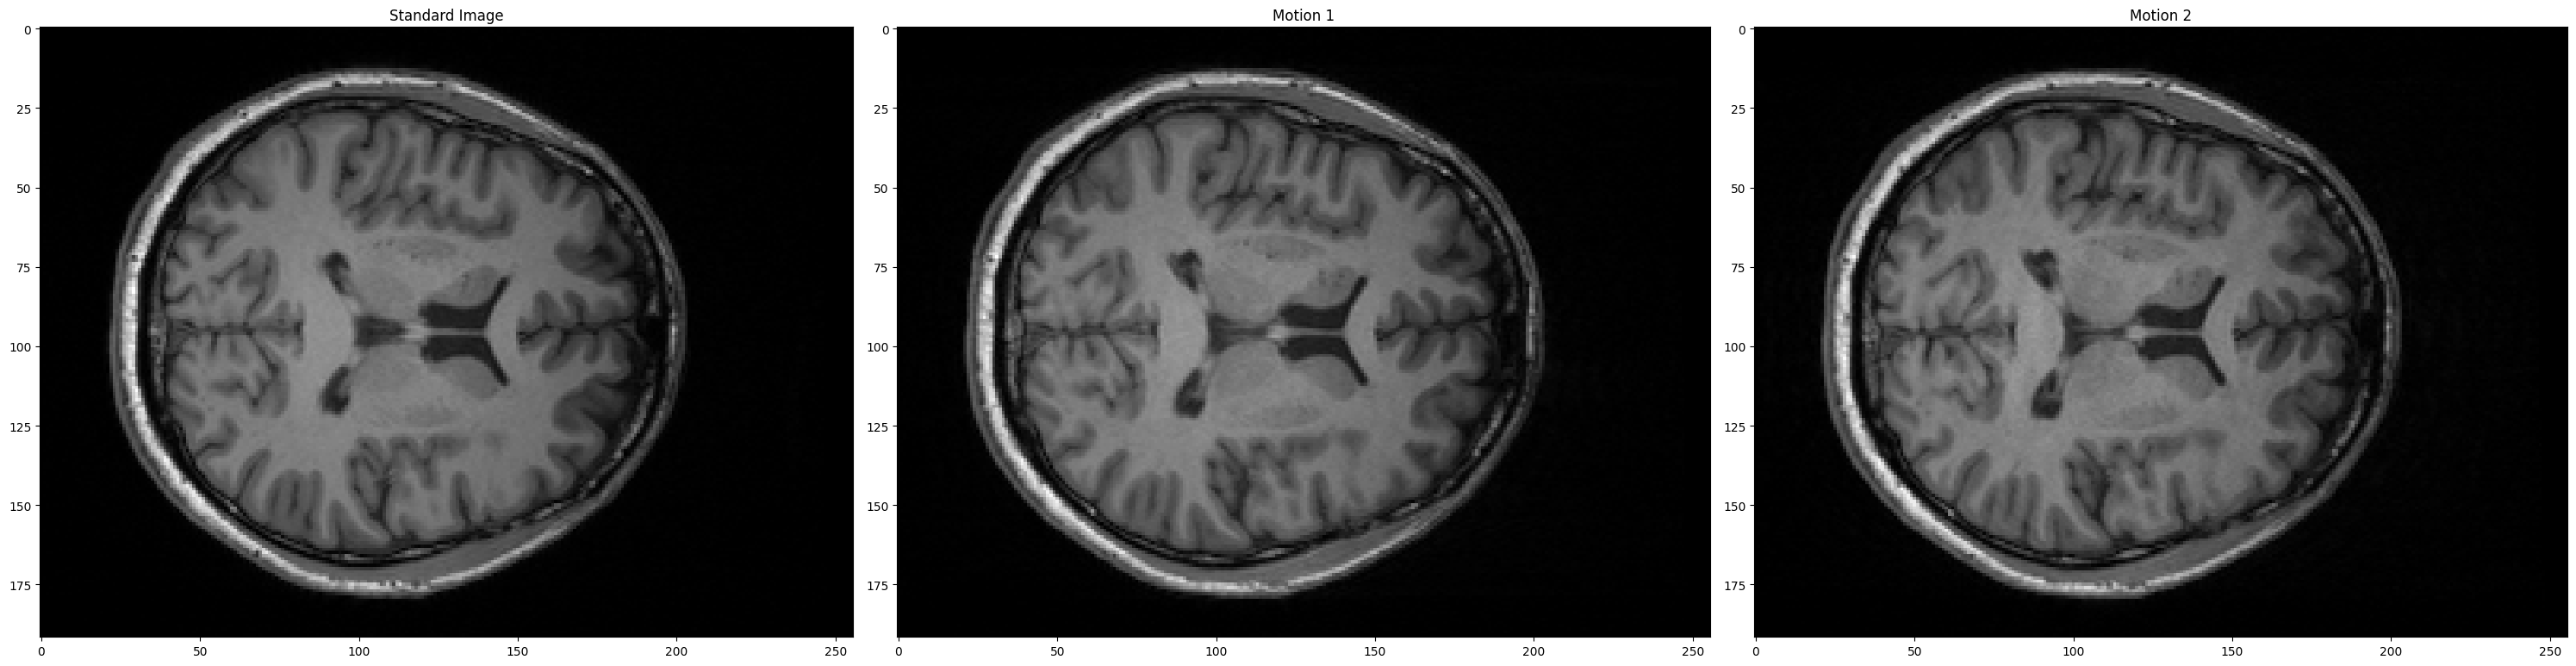

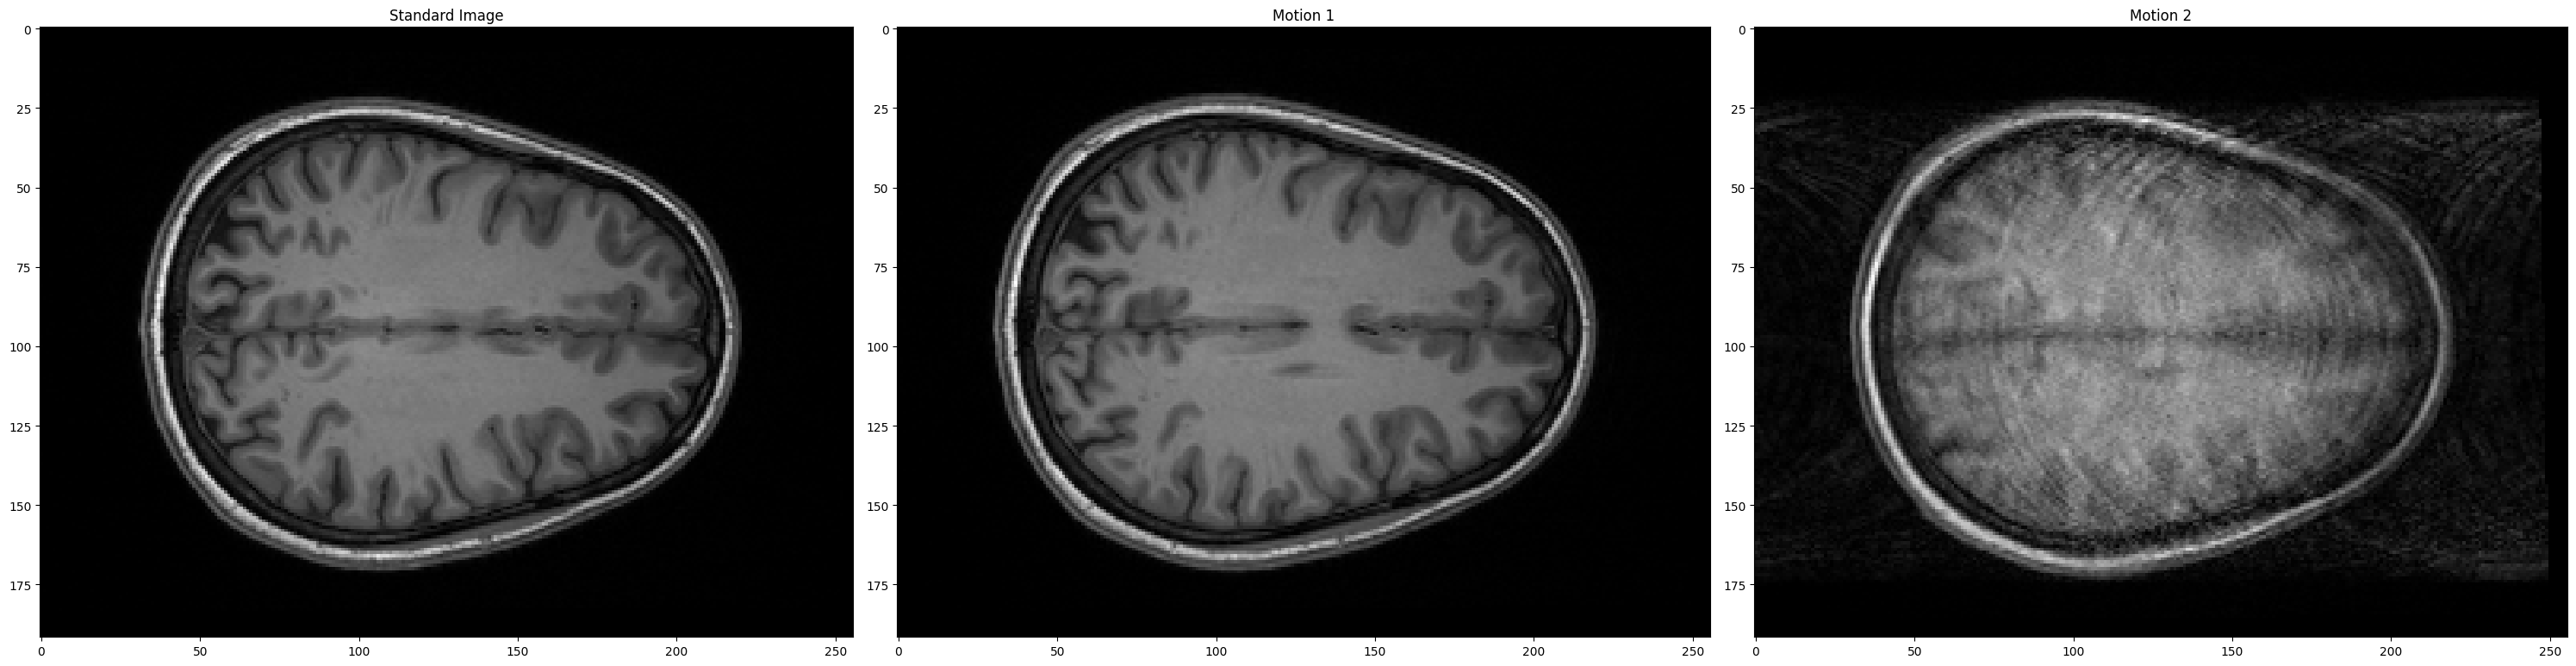

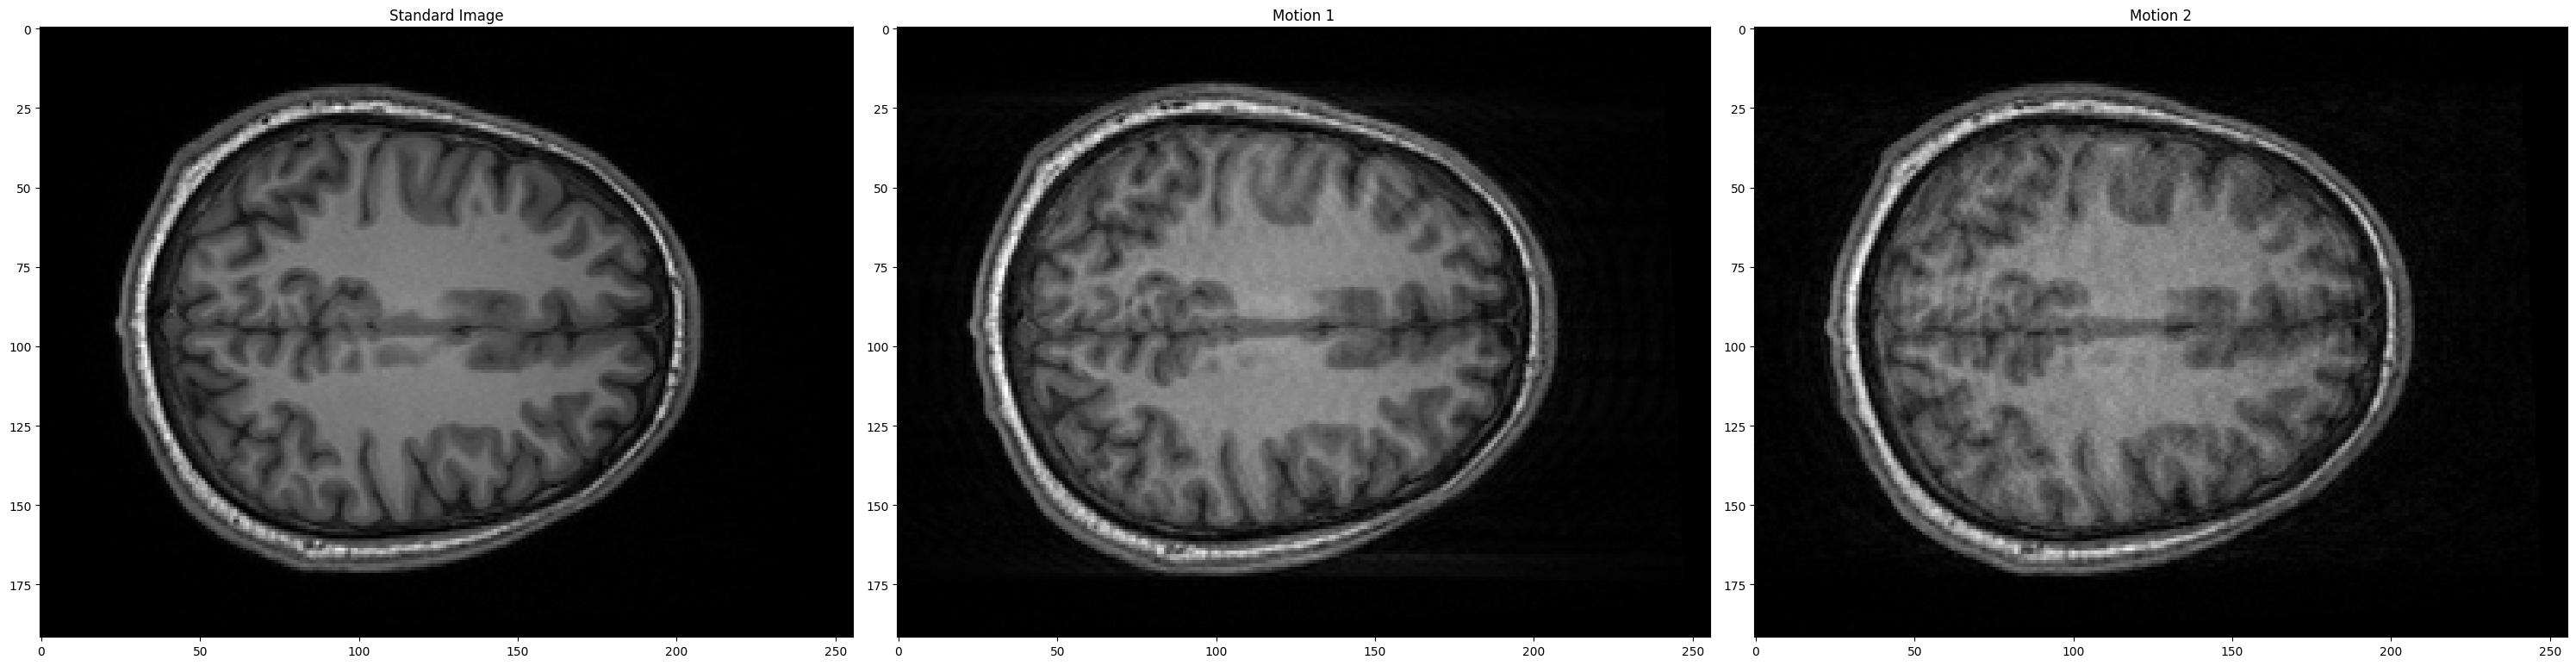

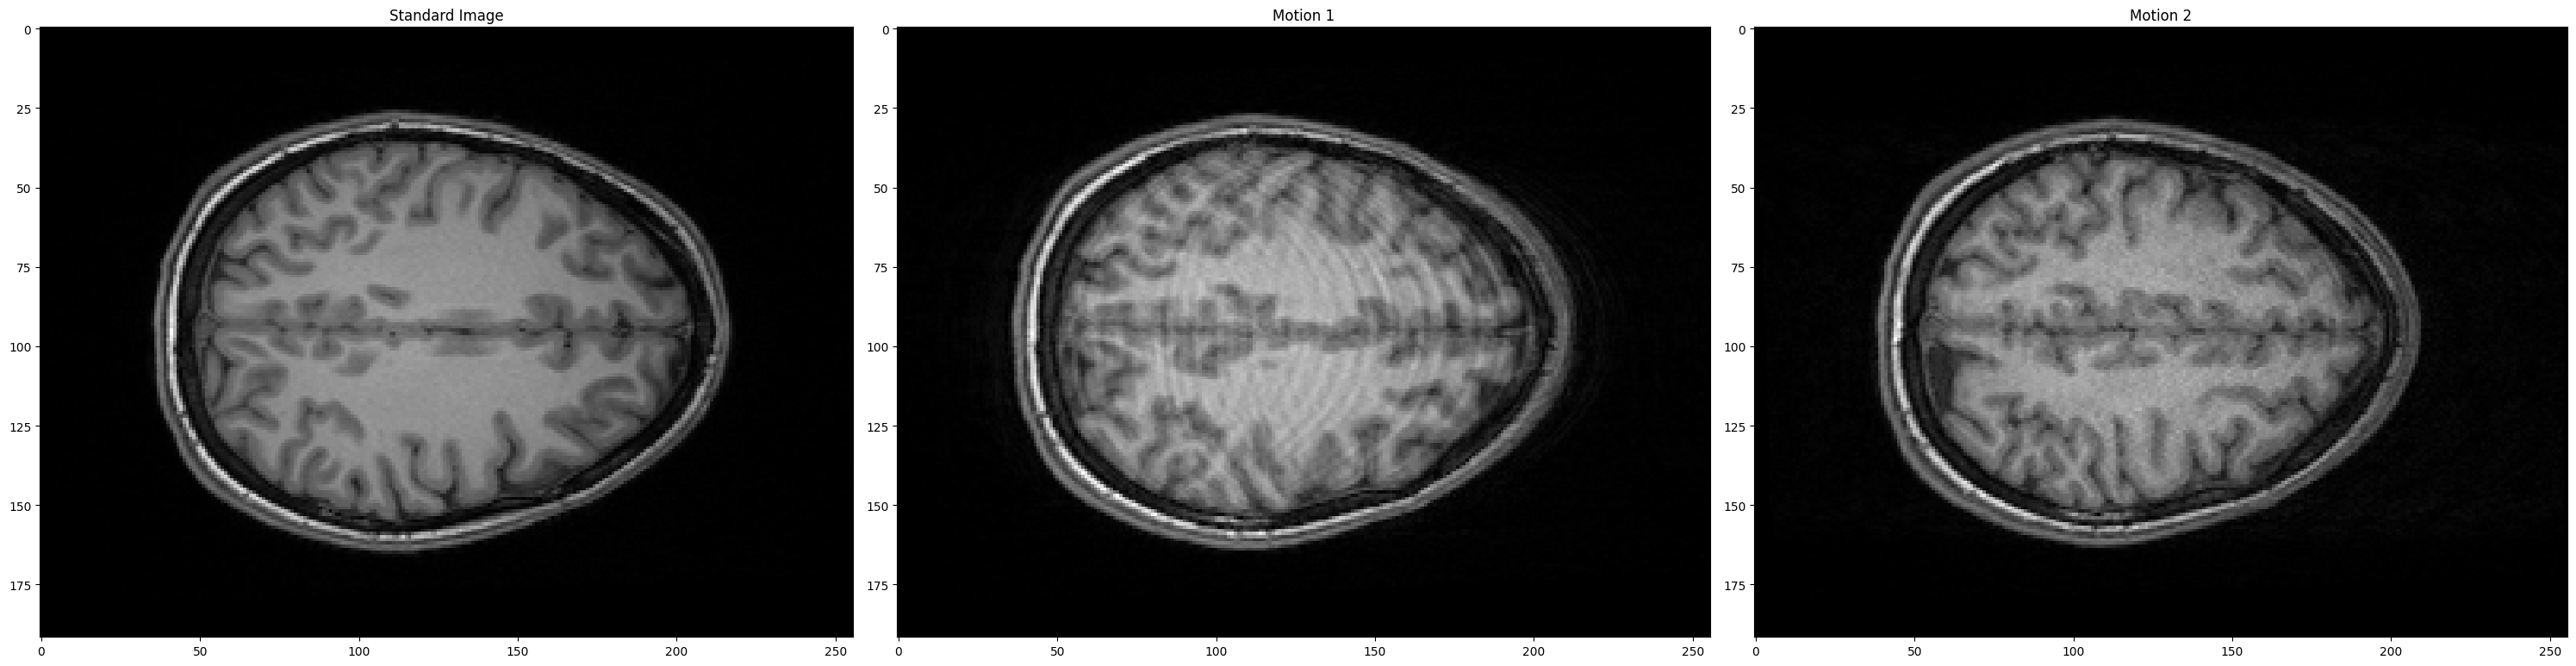

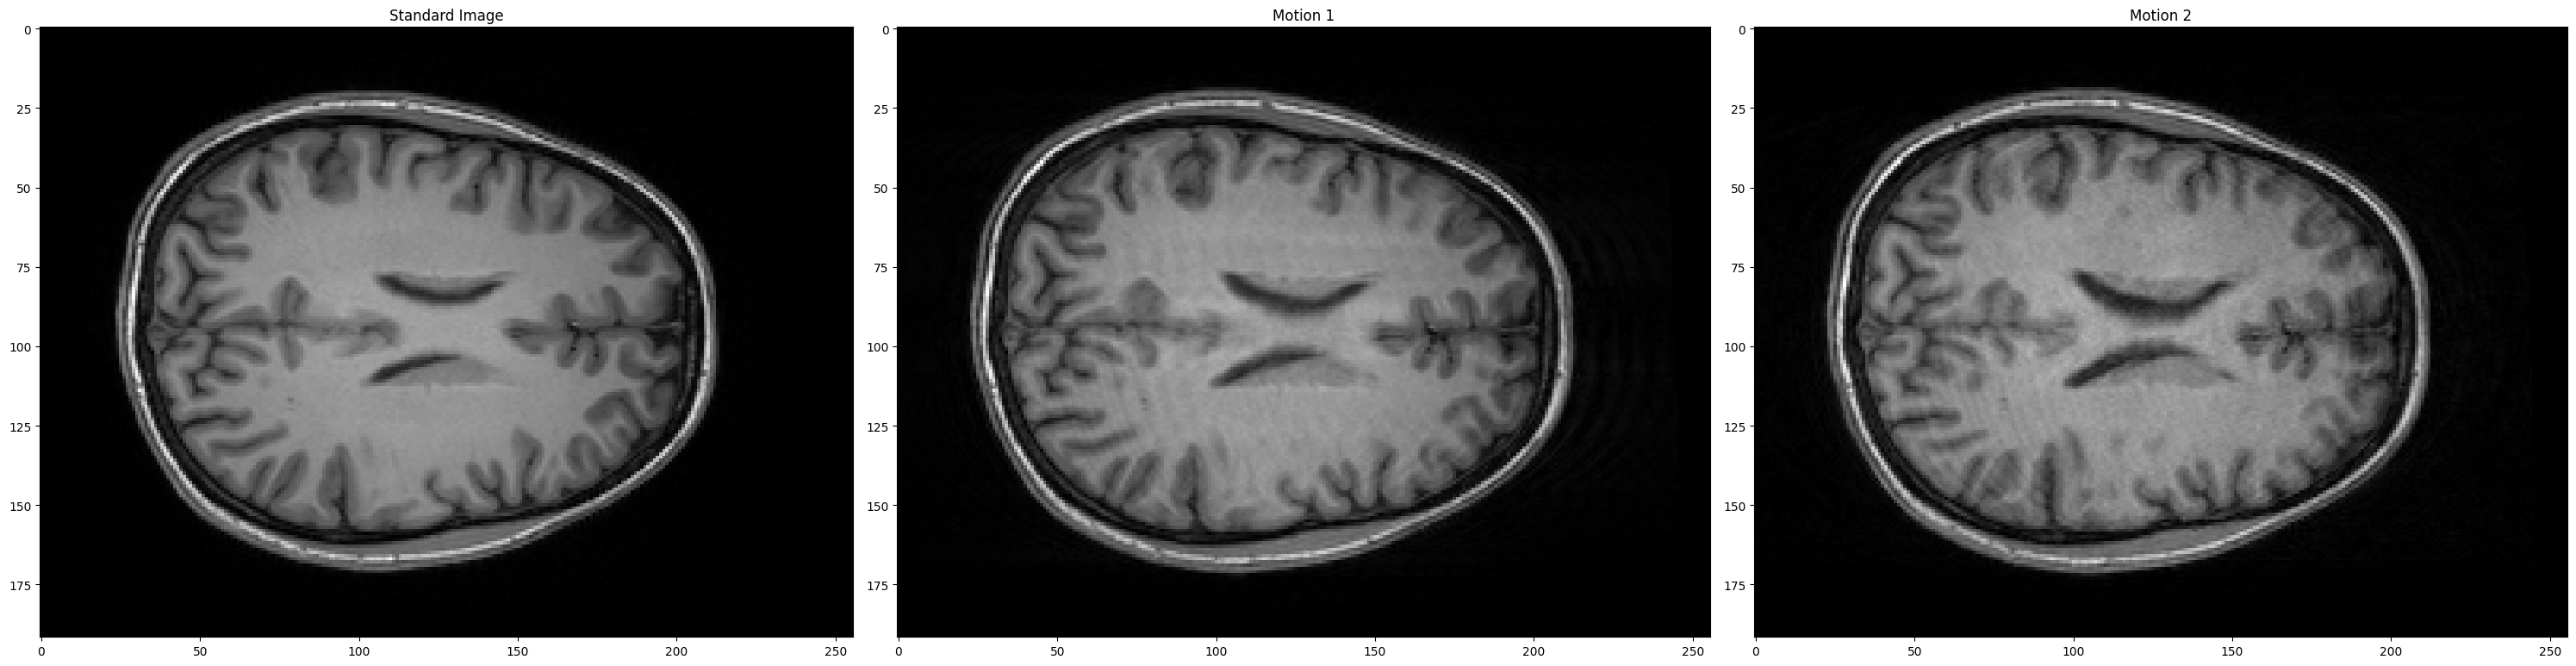

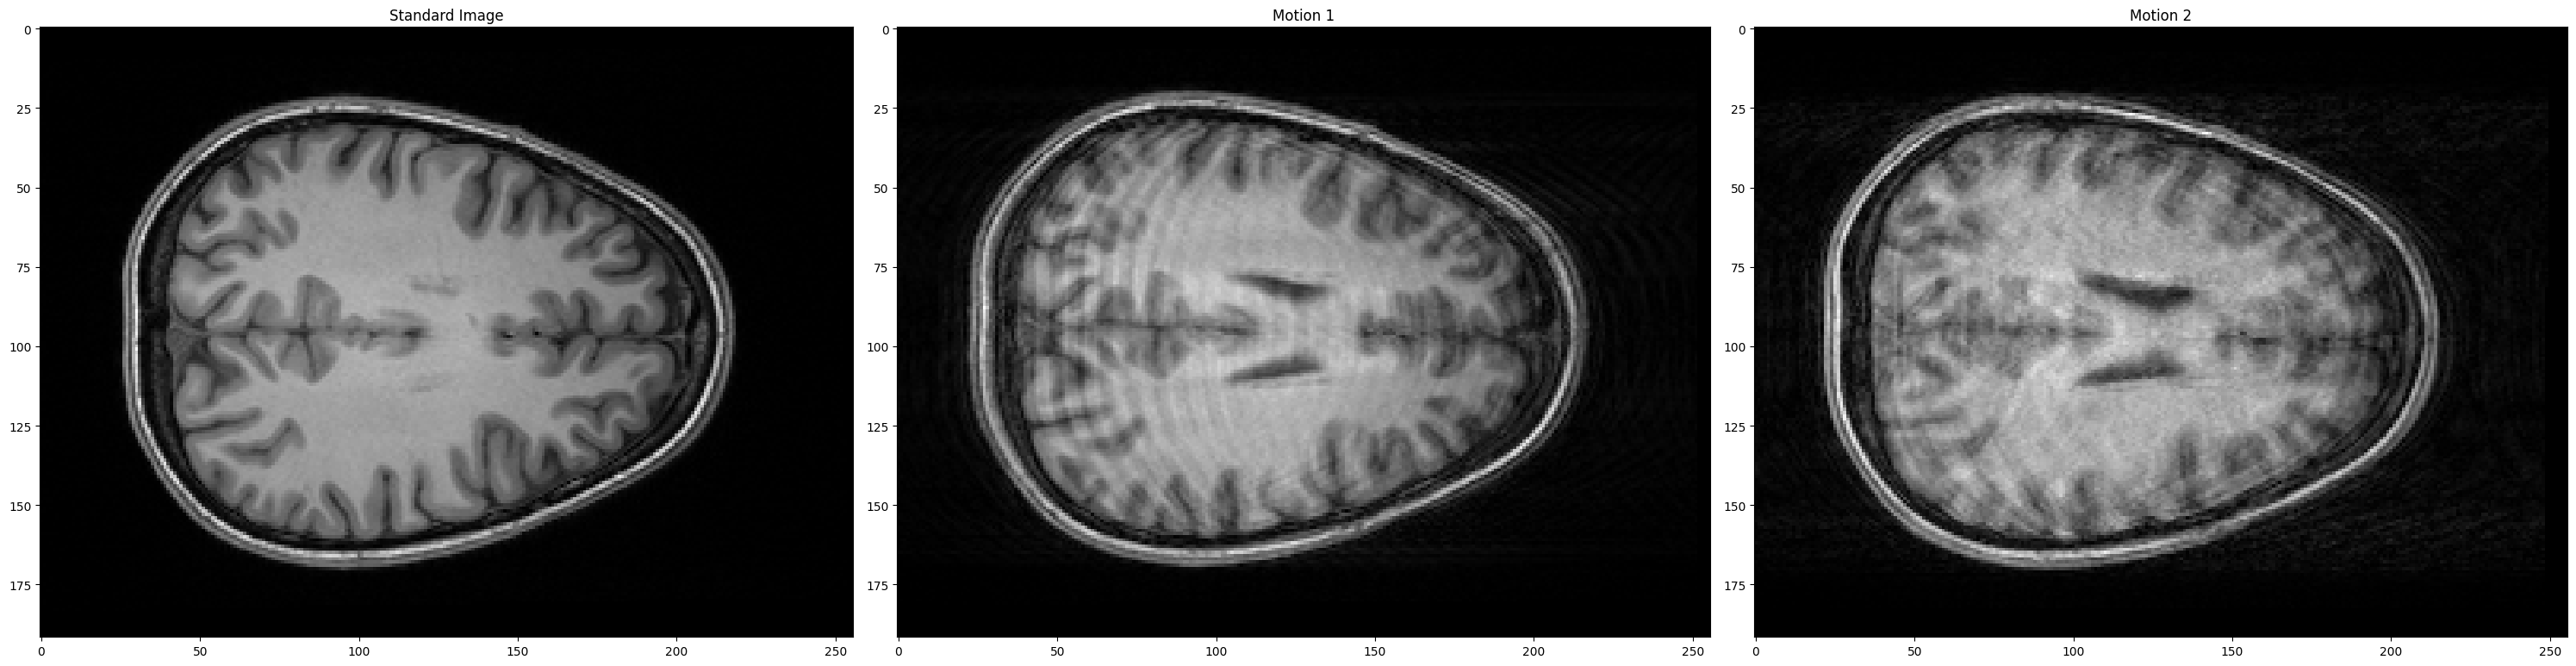

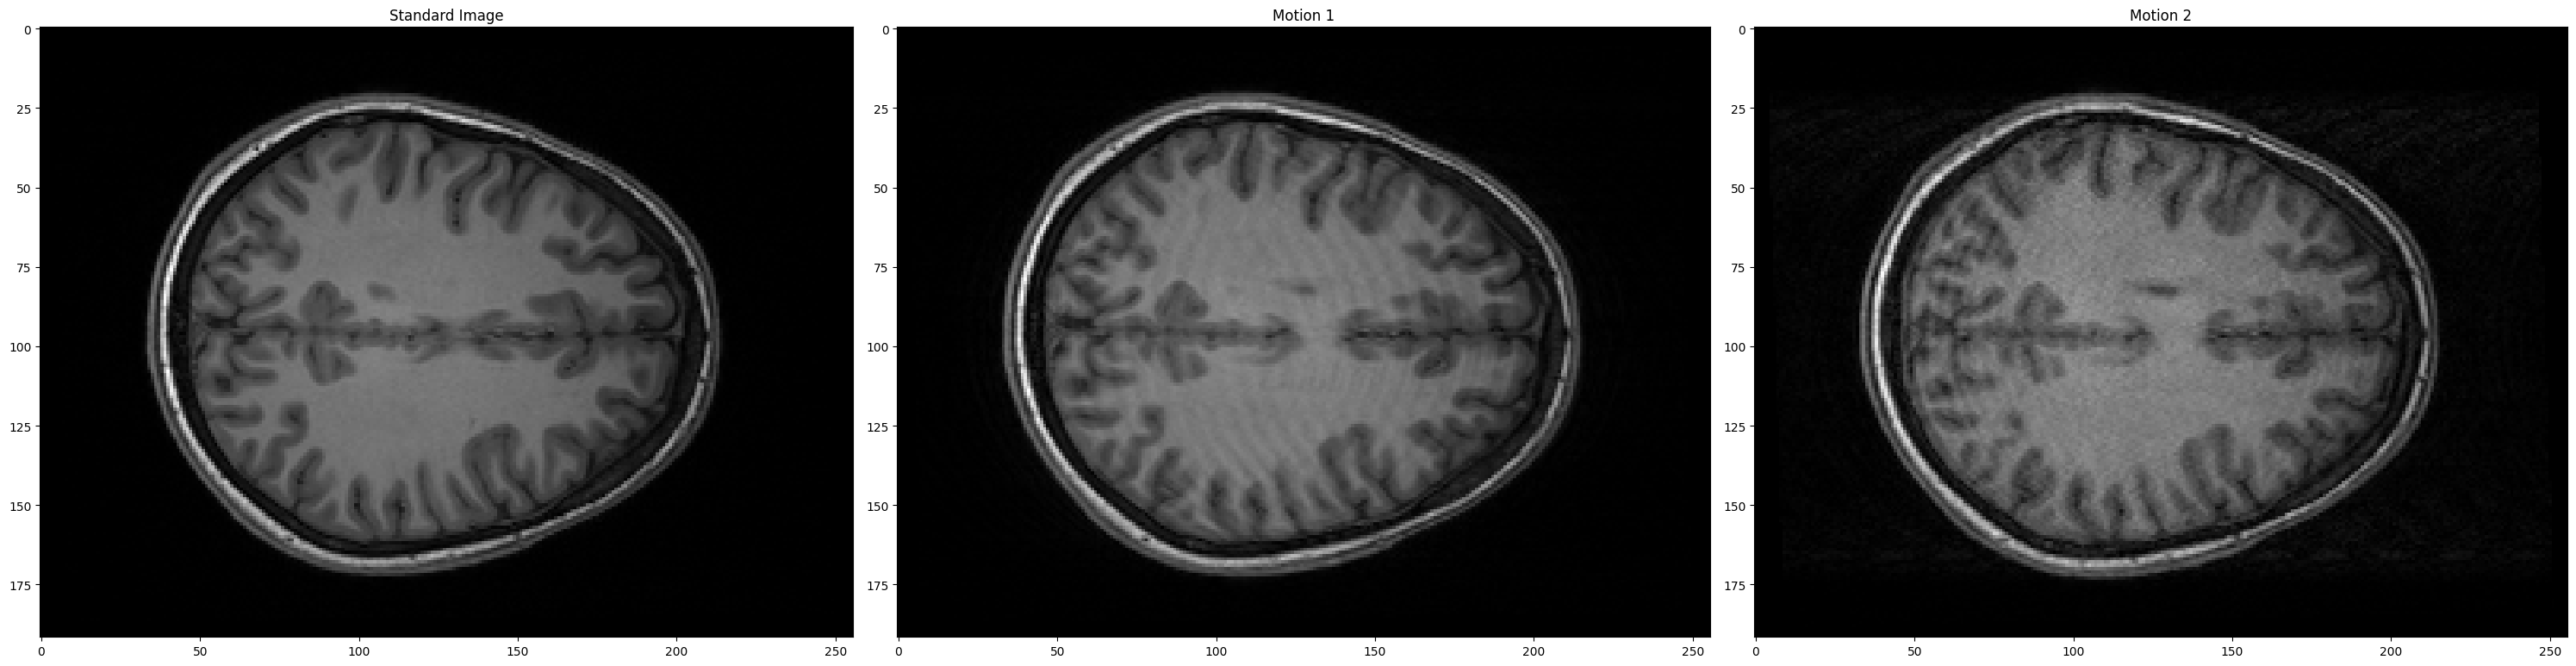

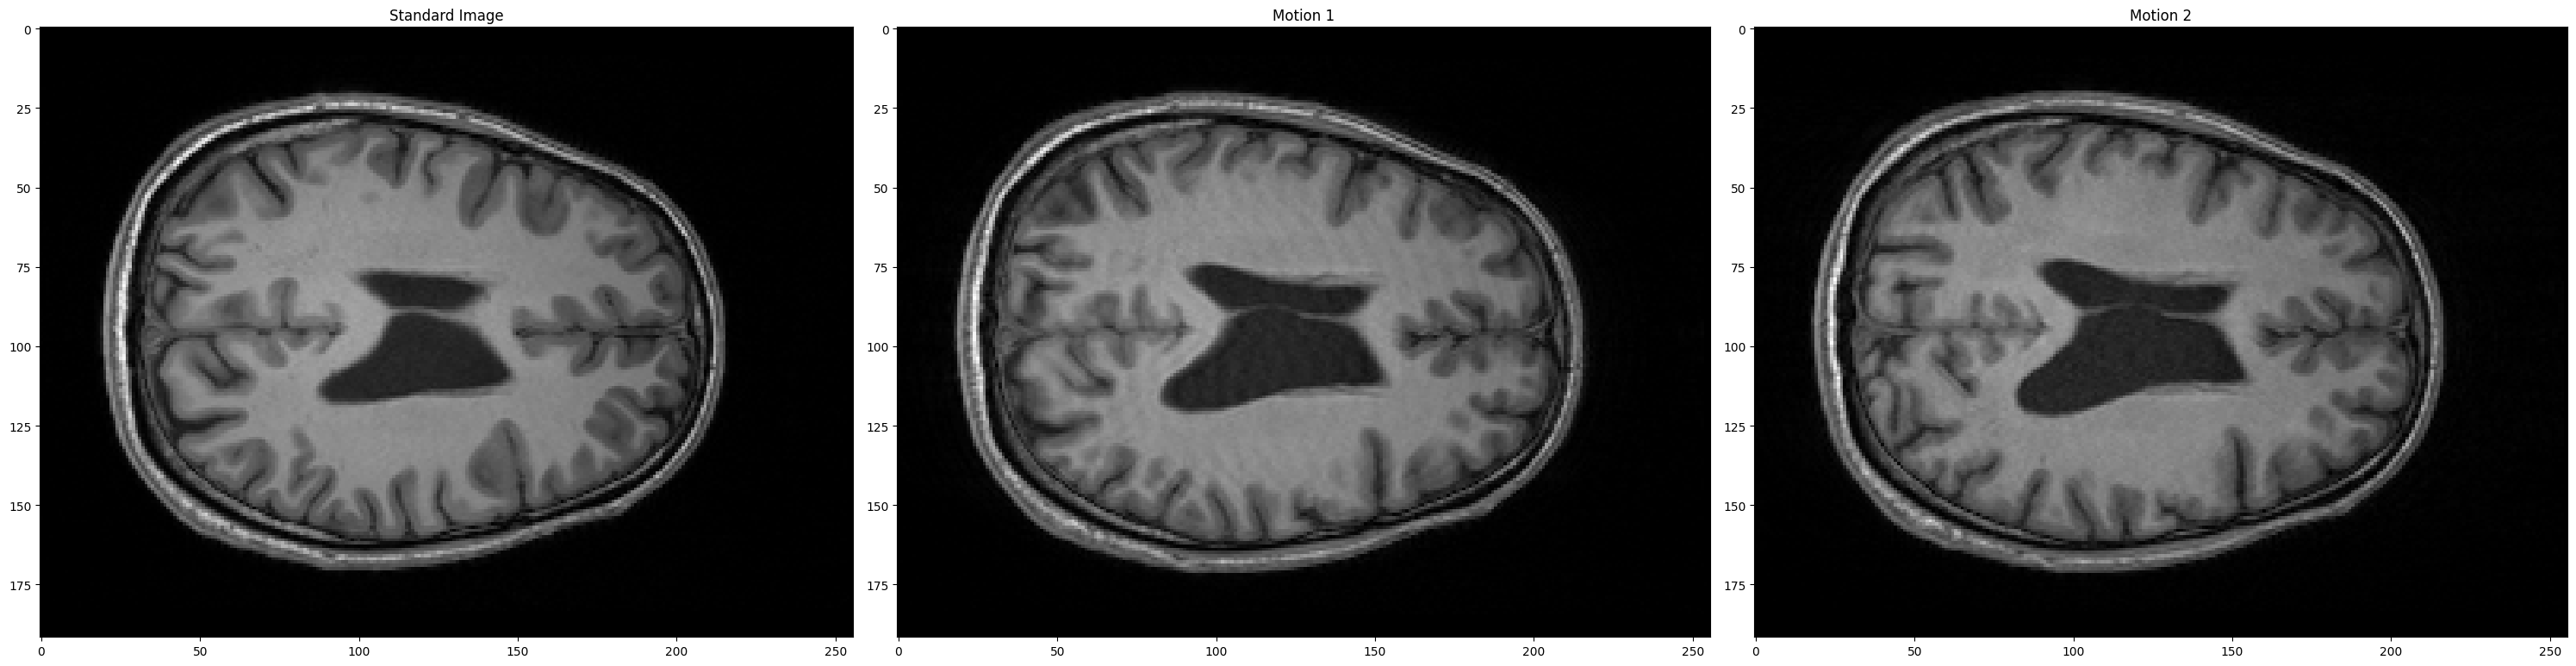

In [19]:

for index,path in enumerate(subfolder_names):
    standard_path = f"D:\motion_blur_dataset\scans\sub-{path}\\anat\sub-{path}_acq-standard_T1w.nii.gz"
    motion_1_path = f"D:\motion_blur_dataset\scans\sub-{path}\\anat\sub-{path}_acq-headmotion1_T1w.nii.gz"
    motion_2_path = f"D:\motion_blur_dataset\scans\sub-{path}\\anat\sub-{path}_acq-headmotion2_T1w.nii.gz"
    slice_number = 170
    try:
        standard_image = nib.load(standard_path).get_fdata()
        # standard_image = scaler.fit_transform(standard_image.reshape(-1, standard_image.shape[-1])).reshape(standard_image.shape) #convert to a range of [0,1]
        standard_image = standard_image[:,:,slice_number]

        motion_1_image = nib.load(motion_1_path).get_fdata()
        # motion_1_image = scaler.fit_transform(motion_1_image.reshape(-1, motion_1_image.shape[-1])).reshape(motion_1_image.shape) #convert to a range of [0,1]
        motion_1_image = motion_1_image[:,:,slice_number]

        motion_2_image = nib.load(motion_2_path).get_fdata()
        # motion_2_image = scaler.fit_transform(motion_2_image.reshape(-1, motion_2_image.shape[-1])).reshape(motion_2_image.shape) #convert to a range of [0,1]
        motion_2_image = motion_2_image[:,:,slice_number]
    except:
        continue

    # Create a figure
    fig = plt.figure(figsize=(30, 30))

    # Create subplots and store their references
    ax1 = plt.subplot(131)
    ax2 = plt.subplot(132)
    ax3 = plt.subplot(133)

    # Add images and titles to each subplot
    ax1.imshow(standard_image, cmap="gray")
    ax1.set_title("Standard Image")

    ax2.imshow(motion_1_image, cmap="gray")
    ax2.set_title("Motion 1")

    ax3.imshow(motion_2_image, cmap="gray")
    ax3.set_title("Motion 2")

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.savefig(f"F:\FYP\FYP\motion_blur_images\scan_{path}.png")
    # Display the figure
    # plt.show()
    # break